### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 5

### Дисциплина: Методы машинного обучения

##### Студент:  Мерич Дорук Каймакджыоглу
##### Группа: НКНбд-01-20

## Москва 2023
***

### Вариант № 15

1. При помощи модуля `pandas_datareader` считайте котировки указанной в индивидуальным задании акции за указанный период времени. 

In [1]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from pandas_datareader import data as pdr
import yfinance as yfin
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

yfin.pdr_override()

In [2]:
ticker = 'KO'
start_date = '2018-01-01'
end_date = '2019-12-31'

df = pdr.get_data_yahoo(ticker, start=start_date, end=end_date)

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,45.910000,45.939999,45.509998,45.540001,38.548195,10872200
2018-01-03,45.490002,45.689999,45.340000,45.439999,38.463558,12635600
2018-01-04,45.560001,46.220001,45.450001,46.080002,39.005302,12709400
2018-01-05,46.020000,46.200001,45.790001,46.070000,38.996834,13113100
2018-01-08,45.950001,46.099998,45.880001,46.000000,38.937580,7068600


2. Визуализируйте котировки акции (столбец `Adj Close`) за весь период на графике. Подпишите оси и рисунок.


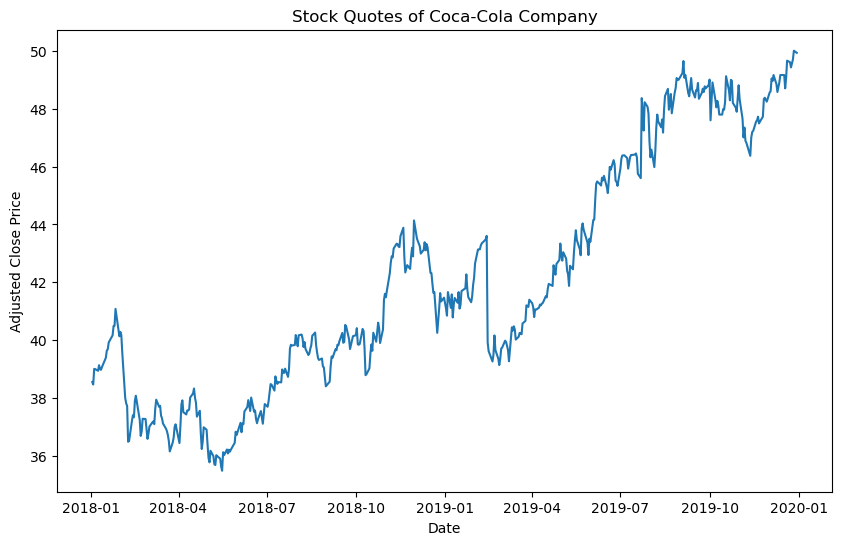

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Stock Quotes of Coca-Cola Company')
plt.show()

3. Вычислите и визуализируйте заданный показатель акции в соответствии с индивидуальным заданием.

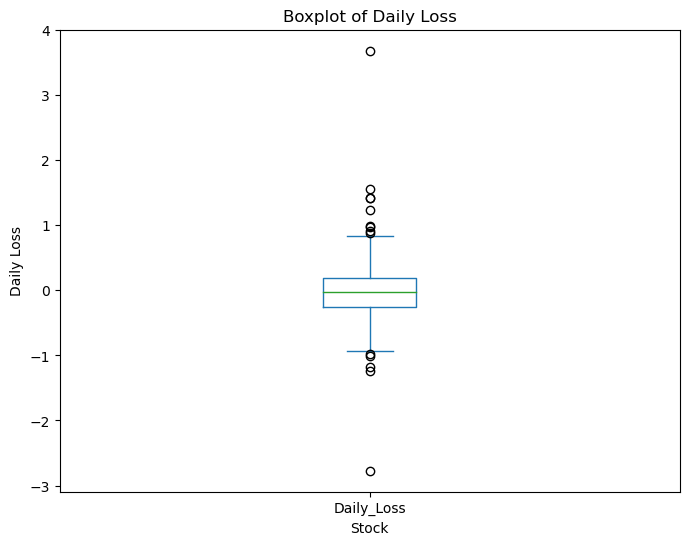

In [18]:
df['Daily_Return'] = df['Adj Close'].diff()

df['Daily_Loss'] = -df['Daily_Return']

df['Daily_Loss'] = -df['Daily_Return']
plt.figure(figsize=(8, 6))
df['Daily_Loss'].plot(kind='box')
plt.xlabel('Stock')
plt.ylabel('Daily Loss')
plt.title('Boxplot of Daily Loss')
plt.show()

4. Сформируйте обучающую, тестовую и валидационные выборки для обучения нейронной сети в соответствии с индивидуальным заданием. 

In [5]:
data = df['Adj Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

lookback = 25
forecast = 12

X = []
y = []

for i in range(lookback, len(scaled_data) - forecast + 1):
    X.append(scaled_data[i - lookback:i, 0])
    y.append(scaled_data[i + forecast - 1, 0])

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

5. Постройте нейронную сеть MLP с нормализующим слоем и одним плотным скрытым слоем из 16 нейронов для прогнозирования стоимости акции и обучите ее на обучающей выборке. Оцените качество прогнозирования при помощи заданного показателя качества на тестовой выборке.

In [6]:
model_mlp = Sequential()
model_mlp.add(BatchNormalization(input_shape=(lookback,)))
model_mlp.add(Dense(16, activation='relu'))
model_mlp.add(Dense(1))

model_mlp.compile(loss='mean_absolute_error', optimizer='adam')

history_mlp = model_mlp.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=0)

In [7]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,model_mlp.predict(X_test))

3/3 [==============================] - 0s 2ms/step


0.32419055606243086

6. Примените указанную в индивидуальном задании технику решения проблемы исчезающих градиентов и постройте нейронную сеть MLP с нормализующим слоем и тремя плотными скрытыми слоями из 16 нейронов для прогнозирования стоимости акции и обучите ее на обучающей выборке. Оцените качество прогнозирования при помощи заданного показателя качества для тестовой выборки.

In [8]:
model_mlp2 = Sequential()
model_mlp2.add(BatchNormalization(input_shape=(lookback,)))
model_mlp2.add(Dense(16, kernel_initializer='lecun_normal', activation='selu'))
model_mlp2.add(Dense(16, kernel_initializer='lecun_normal', activation='selu'))
model_mlp2.add(Dense(16, kernel_initializer='lecun_normal', activation='selu'))
model_mlp2.add(Dense(1))

model_mlp2.compile(loss='mean_absolute_error', optimizer='adam')

history_mlp2 = model_mlp2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=0)

In [9]:
mean_absolute_error(y_test,model_mlp2.predict(X_test))

3/3 [==============================] - 0s 2ms/step


0.41974463774589416

7. Постройте рекуррентную нейронную сеть с нормализующим слоем и одним скрытым слоем LSTM из 16 нейронов для прогнозирования стоимости акции и обучите ее на обучающей выборке. Оцените качество прогнозирования при помощи заданного показателя качества на тестовой выборке.

In [10]:
model_rnn = Sequential()
model_rnn.add(BatchNormalization(input_shape=(lookback, 1)))
model_rnn.add(LSTM(16))
model_rnn.add(Dense(1))

model_rnn.compile(loss='mean_absolute_error', optimizer='adam')

history_rnn = model_rnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=0)

In [11]:
mean_absolute_error(y_test,model_rnn.predict(X_test))

3/3 [==============================] - 1s 5ms/step


0.38158698539571195

8. Визуализируйте кривые обучения для трех построенных моделей на одном рисунке в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду. Используйте для визуализации относительную ошибку (ошибку обучения, деленную на начальную ошибку на первой эпохе). 

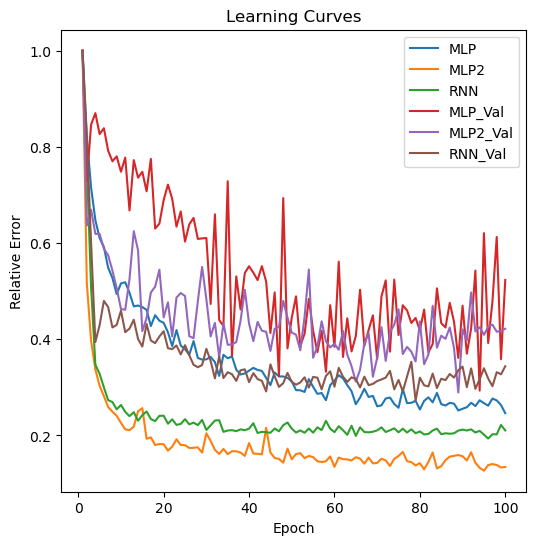

In [17]:
plt.figure(figsize=(6,6))
loss = history_mlp.history["loss"]/np.asarray(history_mlp.history["loss"][0])
val_loss = history_mlp.history["val_loss"]/np.asarray(history_mlp.history["val_loss"][0])
loss2 = history_mlp2.history["loss"]/np.asarray(history_mlp2.history["loss"][0])
val_loss2 = history_mlp2.history["val_loss"]/np.asarray(history_mlp2.history["val_loss"][0])
loss3 = history_rnn.history["loss"]/np.asarray(history_rnn.history["loss"][0])
val_loss3 = history_rnn.history["val_loss"]/np.asarray(history_rnn.history["val_loss"][0])
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, label="MLP")
plt.plot(epochs, loss2, label="MLP2")
plt.plot(epochs, loss3, label="RNN")
plt.plot(epochs, val_loss, label="MLP_Val")
plt.plot(epochs, val_loss2, label="MLP2_Val")
plt.plot(epochs, val_loss3, label="RNN_Val")
plt.xlabel('Epoch')
plt.ylabel('Relative Error')
plt.title('Learning Curves')
plt.legend()
plt.show()

9. Визуализируйте весь набор данных и прогнозы трех построенных моделей для обучающей и тестовой выборок на одном рисунке (ось X – даты, ось Y – стоимость акции), подписывая оси и рисунок и создавая легенду. 

3/3 [==============================] - 0s 2ms/step


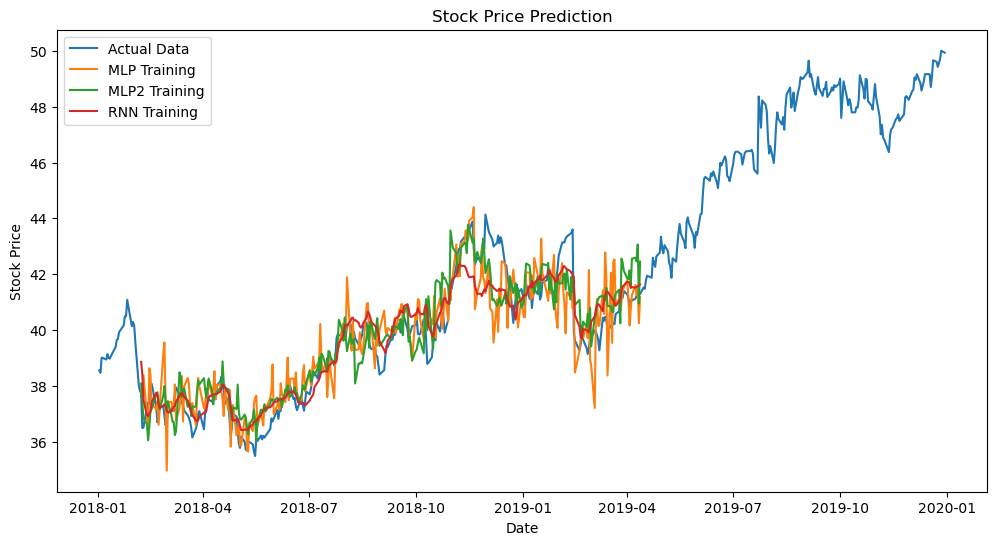

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adj Close'], label='Actual Data')
plt.plot(df.index[lookback:len(X_train) + lookback], scaler.inverse_transform(model_mlp.predict(X_train)), label='MLP Training')
plt.plot(df.index[lookback:len(X_train) + lookback], scaler.inverse_transform(model_mlp2.predict(X_train)), label='MLP2 Training')
plt.plot(df.index[lookback:len(X_train) + lookback], scaler.inverse_transform(model_rnn.predict(X_train)), label='RNN Training')
mlp_test_predictions = scaler.inverse_transform(model_mlp.predict(X_test))

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()